In [12]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

data = []
labels = []
classes = 43
cur_path = os.getcwd()

#Retrieving the images and their labels 

In [3]:
for i in range(classes):
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)

    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

#Converting lists into numpy arrays

In [4]:
data = np.array(data)
labels = np.array(labels)

print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


#Splitting training and testing dataset

In [5]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


#Converting the labels into one hot encoding

In [6]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

#Building the model

In [7]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

#Compilation of the model

In [8]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 15
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))
model.save("my_model.h5")


Epoch 1/15


981/981 [==============================] - 108s 72ms/step - loss: 1.9855 - accuracy: 0.4976 - val_loss: 0.5954 - val_accuracy: 0.8388
Epoch 2/15
981/981 [==============================] - 64s 65ms/step - loss: 0.8681 - accuracy: 0.7474 - val_loss: 0.3799 - val_accuracy: 0.9024
Epoch 3/15
981/981 [==============================] - 65s 66ms/step - loss: 0.6677 - accuracy: 0.8027 - val_loss: 0.2159 - val_accuracy: 0.9438
Epoch 4/15
981/981 [==============================] - 63s 64ms/step - loss: 0.5969 - accuracy: 0.8214 - val_loss: 0.1936 - val_accuracy: 0.9503
Epoch 5/15
981/981 [==============================] - 61s 62ms/step - loss: 0.5248 - accuracy: 0.8445 - val_loss: 0.1537 - val_accuracy: 0.9543
Epoch 6/15
981/981 [==============================] - 61s 62ms/step - loss: 0.4842 - accuracy: 0.8543 - val_loss: 0.1507 - val_accuracy: 0.9651
Epoch 7/15
981/981 [==============================] - 61s 62ms/step - loss: 0.4418 - accuracy: 0.8662 - val_loss: 0.1423 - val_accur

C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


#plotting graphs for accuracy 

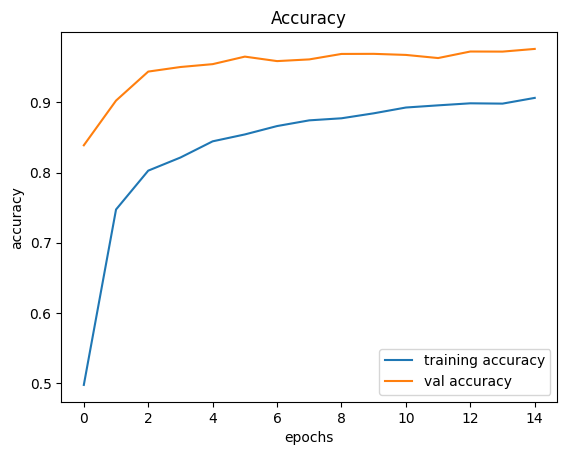

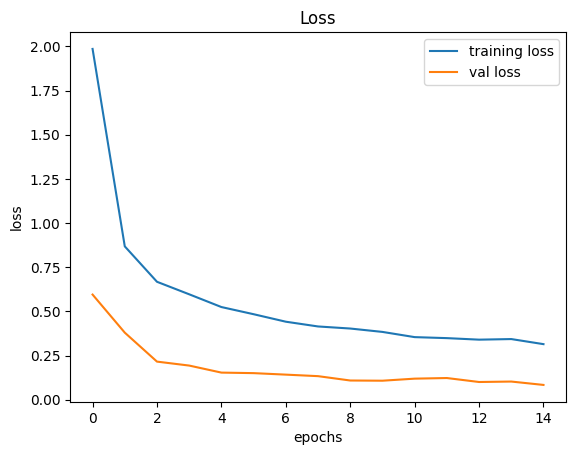

In [9]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

#testing accuracy on test dataset

In [10]:
from sklearn.metrics import accuracy_score

y_test = pd.read_csv('Test.csv')

labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data=[]

for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))

X_test=np.array(data)

pred = model.predict(X_test)
pred_classes = np.argmax(pred, axis=-1)

395/395 [==============================] - 8s 19ms/step


#Accuracy with the test data

In [11]:
from sklearn.metrics import accuracy_score
print(accuracy_score(labels, pred_classes))
model.save('traffic_classifier.h5')

0.9300870942201108


C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
